# Get feature vectors for one frame

In [4]:
from OSVOS_PyTorch.get_feature_vector import get_OSVOS_feature
import numpy as np
import os

basedirname = os.getcwd()

#Enter manually
key_point_positions_path = os.path.join(basedirname, 'DAVIS_2016/DAVIS/Contours/480p/blackswan/00000.npy')
layer = 4
img_path = os.path.join(basedirname, 'DAVIS_2016/DAVIS/JPEGImages/480p/blackswan/00000.jpg')
model_path =  os.path.join(basedirname, 'OSVOS_PyTorch/models/blackswan_epoch-499.pth')
plot_save_path =  os.path.join(basedirname, 'visualization/TSNE')

filename = os.path.basename(os.path.dirname(os.path.dirname(img_path))) + '_' + os.path.basename(os.path.dirname(img_path)) + '_' + os.path.splitext(os.path.basename(img_path))[0] + '_' + os.path.splitext(os.path.basename(model_path))[0] + '_layer_' + str(layer) + '.jpg'
print(filename)
plot_save_path = os.path.join(plot_save_path, filename)
print('Saving to:', plot_save_path)

key_point_positions = np.load(key_point_positions_path)
feature_vectors = get_OSVOS_feature(key_point_positions, layer, img_path, model_path)

480p_blackswan_00000_blackswan_epoch-499_layer_4.jpg
Saving to: /home/maximilian_boemer/in2364-adl4cv/visualization/TSNE/480p_blackswan_00000_blackswan_epoch-499_layer_4.jpg
Image shape: (1, 3, 480, 854)
Constructing OSVOS architecture..
Initializing weights..
Create model for feature_vector after 4 layers...
Feature vector shape: torch.Size([1, 64, 480, 854])


TypeError: can't convert CUDA tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

# t-SNE Visualization

In [46]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [47]:
def scatter(x, colors=np.arange(256)):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(32, 32))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=500, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=15)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.savefig(plot_save_path)
    return f, ax, sc, txts

In [48]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

num_keypoints = 256
_, dims = feature_vectors[0].cpu().detach().numpy().shape
feature_vectors_np = np.zeros((num_keypoints, dims))
for idx, vector in enumerate(feature_vectors):
    vector = vector[0,:].cpu().detach().numpy()
    feature_vectors_np[idx, :] = vector

tsne = TSNE(perplexity=255, random_state=RS).fit_transform(feature_vectors_np)

print(tsne)
print(tsne.shape)
print('t-SNE done!')

[[-0.00994381  0.39747113]
 [-0.06487714  0.5099563 ]
 [-0.01306777  0.398359  ]
 [-0.07268901  0.5192898 ]
 [-0.13110887  0.51802444]
 [-0.15490681  0.51723236]
 [-0.15713948  0.51468617]
 [-0.15711161  0.5217374 ]
 [-0.16461177  0.52683055]
 [-0.17766567  0.51622397]
 [-0.18348339  0.5156072 ]
 [-0.12525845  0.52382255]
 [-0.1610372   0.5198154 ]
 [-0.15642479  0.52096885]
 [-0.17244333  0.52020454]
 [-0.15462027  0.52489483]
 [-0.1579654   0.51994   ]
 [-0.18002144  0.5144945 ]
 [-0.14566083  0.5190309 ]
 [-0.15607409  0.52123886]
 [-0.15000689  0.5196416 ]
 [-0.16636641  0.5154339 ]
 [-0.14472026  0.51453257]
 [-0.1435182   0.51813585]
 [-0.14289208  0.5135683 ]
 [-0.11390922  0.51931685]
 [-0.03929229  0.49436942]
 [-0.01621331  0.45928076]
 [-0.02258677  0.47084957]
 [-0.03581651  0.48890892]
 [-0.02186899  0.47043255]
 [-0.03385052  0.48819113]
 [-0.03278779  0.4885229 ]
 [-0.02358605  0.4745367 ]
 [-0.02143654  0.47113663]
 [-0.01684959  0.46077782]
 [-0.088391    0.5192414 ]
 

(<Figure size 2304x2304 with 1 Axes>,
 [Text(-0.009943808, 0.39747113, '0'),
  Text(-0.06487714, 0.5099563, '1'),
  Text(-0.013067765, 0.398359, '2'),
  Text(-0.07268901, 0.5192898, '3'),
  Text(-0.13110887, 0.51802444, '4'),
  Text(-0.15490681, 0.51723236, '5'),
  Text(-0.15713948, 0.51468617, '6'),
  Text(-0.15711161, 0.5217374, '7'),
  Text(-0.16461177, 0.52683055, '8'),
  Text(-0.17766567, 0.51622397, '9'),
  Text(-0.18348339, 0.5156072, '10'),
  Text(-0.12525845, 0.52382255, '11'),
  Text(-0.1610372, 0.5198154, '12'),
  Text(-0.15642479, 0.52096885, '13'),
  Text(-0.17244333, 0.52020454, '14'),
  Text(-0.15462027, 0.52489483, '15'),
  Text(-0.1579654, 0.51994, '16'),
  Text(-0.18002144, 0.5144945, '17'),
  Text(-0.14566083, 0.5190309, '18'),
  Text(-0.15607409, 0.52123886, '19'),
  Text(-0.15000689, 0.5196416, '20'),
  Text(-0.16636641, 0.5154339, '21'),
  Text(-0.14472026, 0.51453257, '22'),
  Text(-0.1435182, 0.51813585, '23'),
  Text(-0.14289208, 0.5135683, '24'),
  Text(-0.113

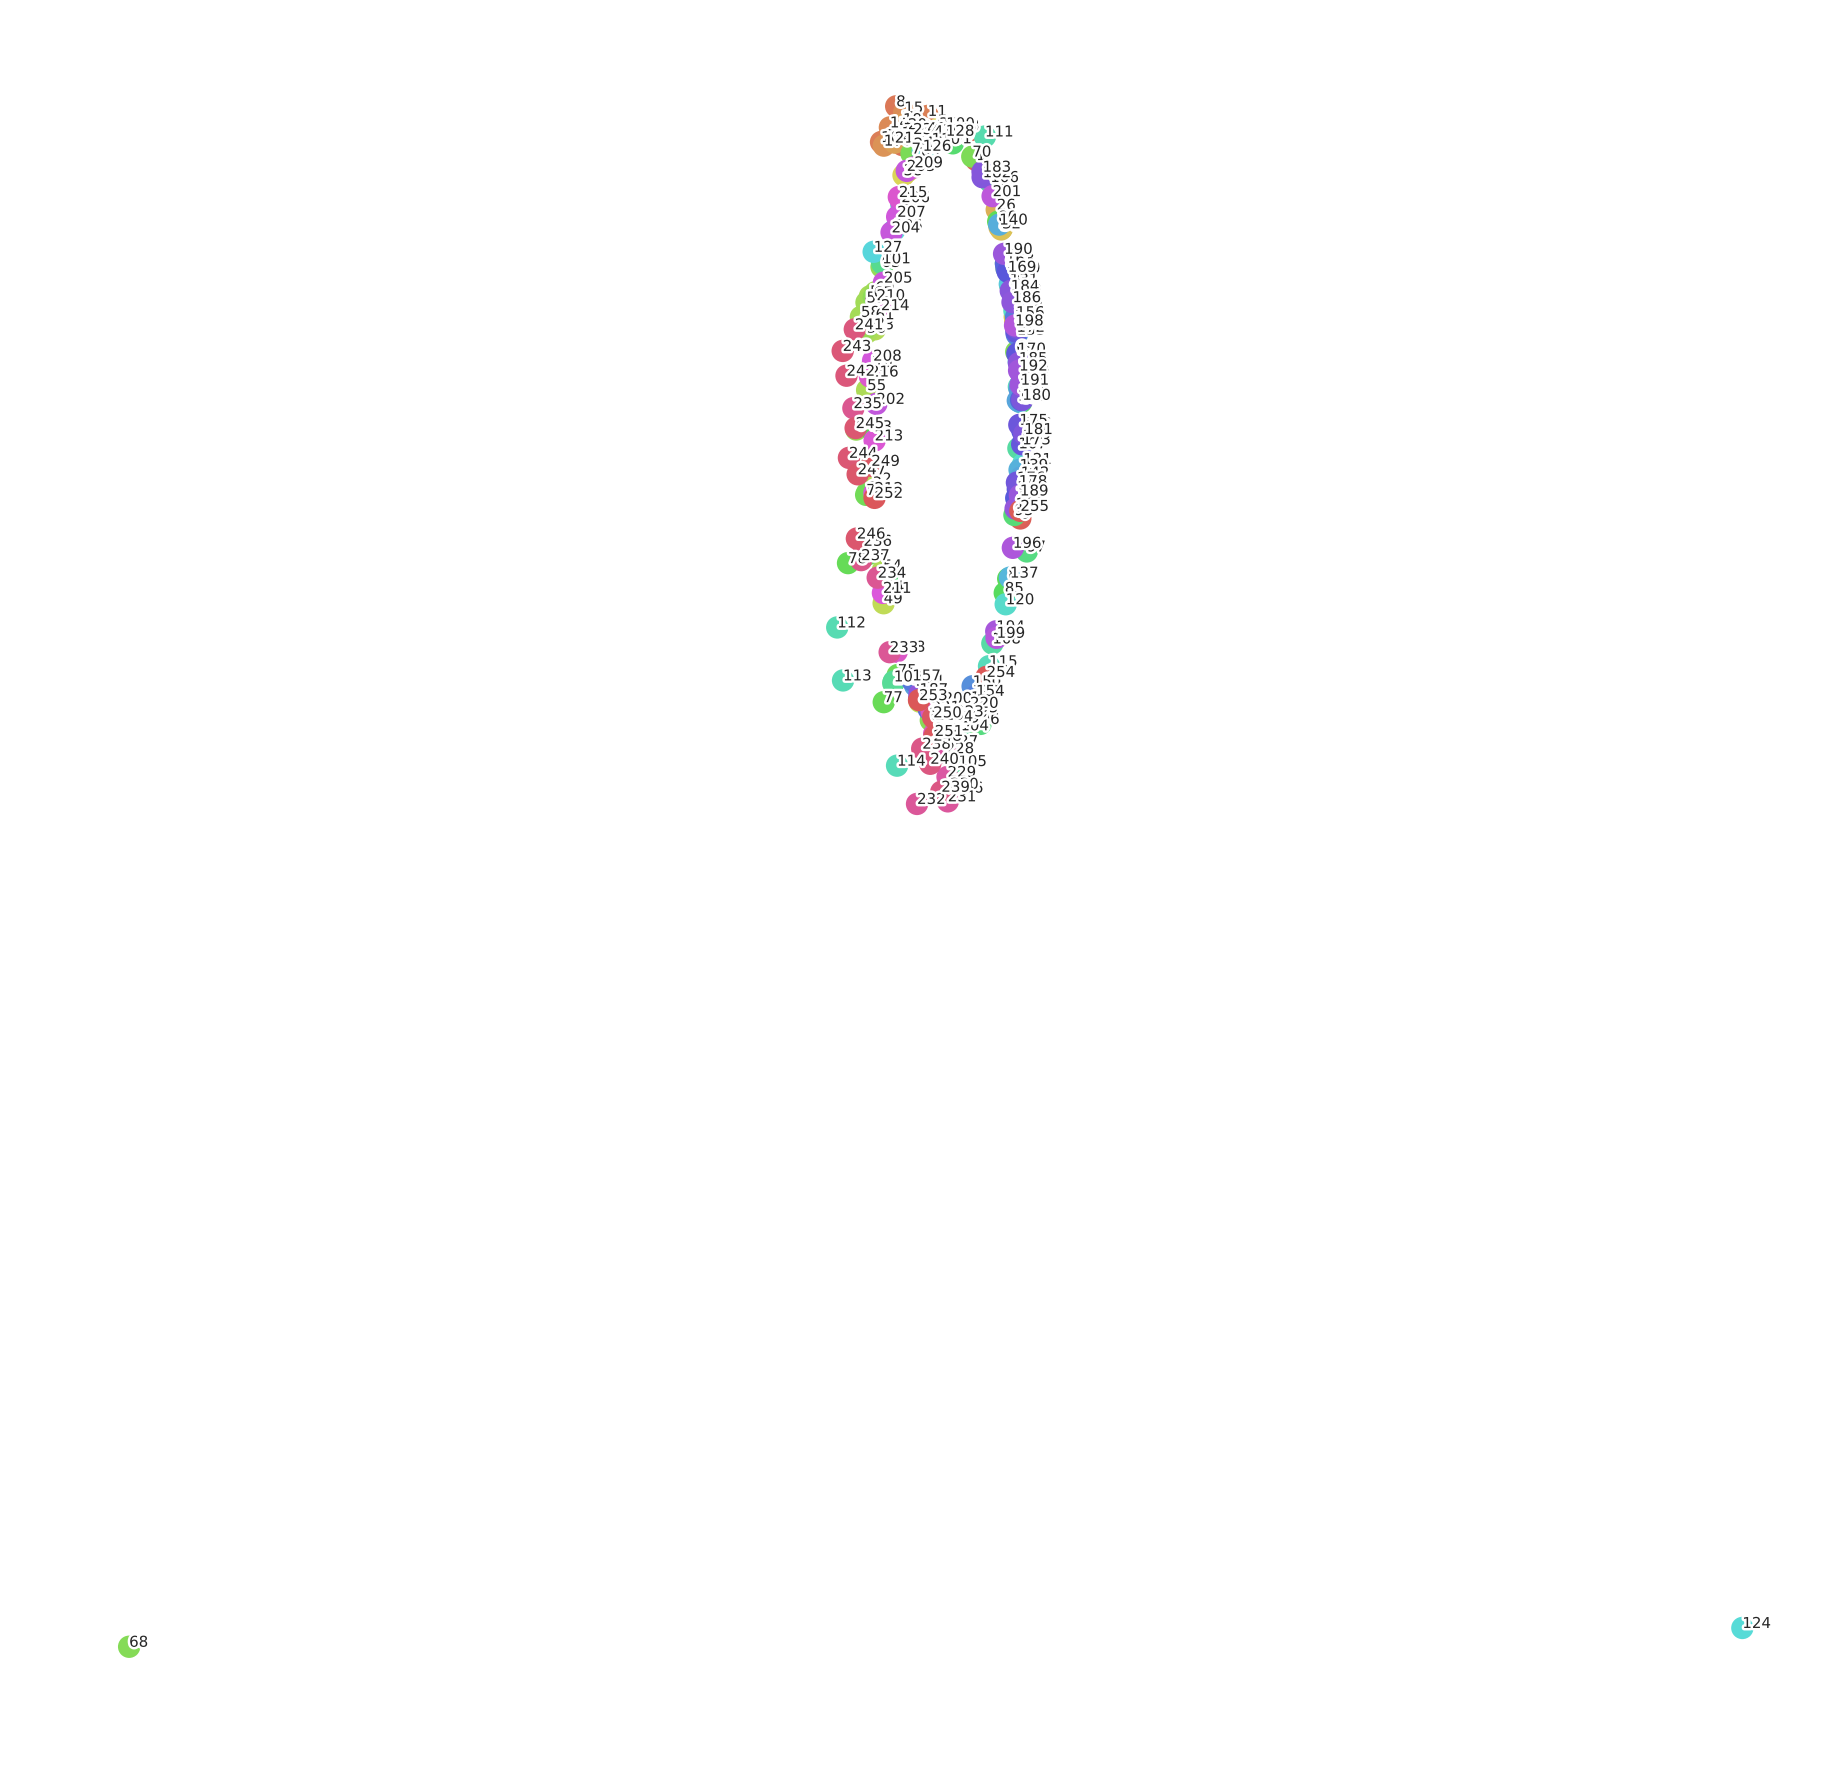

In [49]:
scatter(tsne, np.arange(num_keypoints))